In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

In [2]:
datos_antigua = pd.read_csv("datos_antigua.csv", delimiter=",", on_bad_lines='skip')
datos_nueva = pd.read_csv("datos_nueva.csv", delimiter=",", on_bad_lines='skip')

In [3]:
datos_nueva.tail()

,# Shape,Cry_st,bx,by,bz,C00,C01,C02,C03,C04,...,eig_490,eig_491,eig_492,eig_493,eig_494,eig_495,eig_496,eig_497,eig_498,eig_499
29971,2.0,3.0,0.849784,1.747200,1.286324,2.102213,1.752702,1.752702,0.0,0.0,...,92.291342,92.379431,92.381028,92.415602,92.934170,93.009411,93.067120,93.240414,93.314760,93.703052
29972,0.0,1.0,0.362315,1.323497,2.085405,1.708327,0.268272,0.203215,0.0,0.0,...,193.015642,193.224126,193.428187,193.743770,193.800277,194.281605,194.472591,194.613801,196.315923,197.362072
29973,2.0,1.0,2.459641,0.644261,1.205223,2.942018,0.229762,0.204584,0.0,0.0,...,228.753100,228.789253,229.869192,229.921490,229.948056,230.733146,232.588079,233.153801,233.445739,233.939058
29974,2.0,0.0,0.175118,4.368512,2.496529,1.515486,0.117556,0.011095,0.0,0.0,...,591.617111,594.032301,594.946059,603.271550,605.367473,608.196413,611.328753,611.414138,612.400233,612.748704
29975,1.0,3.0,0.366332,2.272205,1.529635,2.683064,2.274339,2.274339,0.0,0.0,...,159.501033,159.771650,160.450949,161.414034,161.648343,162.466763,162.649543,162.745065,163.663375,164.129209


In [4]:
def normalizar(d_frame):
    for column in d_frame.keys()[2:]:
        if not sum(d_frame[column]) == 0:
            the_minimus = min(d_frame[column])
            the_maximus = max(d_frame[column])
            d_frame[column] = (d_frame[column] - the_minimus)/(the_maximus - the_minimus)
    #fin for
#fin función

In [5]:
def one_hottear(d_frame, cols_discretas):
    cols_nuevas = []
    for column in cols_discretas:
        posibles_valores = set(d_frame[column])
        for i in posibles_valores:
            d_frame[column + str(i)] = 0
            d_frame.loc[d_frame[column] == i, column + str(i)] = 1
            cols_nuevas.append(column + str(i))
        #fin for 
        del d_frame[column]
    #fin for 
    d_frame.loc[:, cols_nuevas + [col for col in d_frame.columns if col not in cols_nuevas]]
#fin función

In [6]:
normalizar(datos_antigua)
normalizar(datos_nueva)
datos_nueva.head()

,# Shape,Cry_st,bx,by,bz,C00,C01,C02,C03,C04,...,eig_490,eig_491,eig_492,eig_493,eig_494,eig_495,eig_496,eig_497,eig_498,eig_499
0,0.0,0.0,0.058894,0.170800,0.053509,0.476310,0.073788,0.058573,0.0,0.0,...,0.098776,0.098794,0.096016,0.096613,0.096800,0.095654,0.095648,0.095667,0.095482,0.095990
1,0.0,0.0,0.132523,0.166606,0.022045,0.330162,0.063730,0.040952,0.0,0.0,...,0.162719,0.162781,0.158314,0.158264,0.158170,0.156597,0.156636,0.156931,0.157563,0.159661
2,0.0,2.0,0.147322,0.039461,0.092701,0.934634,0.077624,0.077624,0.0,0.0,...,0.053226,0.053273,0.051689,0.051758,0.051770,0.051302,0.051255,0.051106,0.051235,0.051176
3,1.0,3.0,0.504377,0.037436,0.032739,0.166672,0.164409,0.164409,0.0,0.0,...,0.170999,0.170978,0.166438,0.167116,0.167217,0.165134,0.165712,0.166052,0.166001,0.166268
4,0.0,0.0,0.082783,0.120839,0.054916,0.465143,0.044963,0.055534,0.0,0.0,...,0.139906,0.139841,0.135759,0.135669,0.135762,0.134071,0.134075,0.133890,0.133888,0.133898


In [7]:
one_hottear(datos_antigua, ["# Shape", "Cry_st"])
one_hottear(datos_nueva, ["# Shape", "Cry_st"])
datos_nueva.head()

/tmp/ipykernel_23678/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d_frame[column + str(i)] = 0
/tmp/ipykernel_23678/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d_frame[column + str(i)] = 0
/tmp/ipykernel_23678/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

,bx,by,bz,C00,C01,C02,C03,C04,C05,C11,...,eig_497,eig_498,eig_499,# Shape0.0,# Shape1.0,# Shape2.0,Cry_st0.0,Cry_st1.0,Cry_st2.0,Cry_st3.0
0,0.058894,0.170800,0.053509,0.476310,0.073788,0.058573,0.0,0.0,0.0,0.181175,...,0.095667,0.095482,0.095990,1,0,0,1,0,0,0
1,0.132523,0.166606,0.022045,0.330162,0.063730,0.040952,0.0,0.0,0.0,0.809886,...,0.156931,0.157563,0.159661,1,0,0,1,0,0,0
2,0.147322,0.039461,0.092701,0.934634,0.077624,0.077624,0.0,0.0,0.0,0.934613,...,0.051106,0.051235,0.051176,1,0,0,0,0,1,0
3,0.504377,0.037436,0.032739,0.166672,0.164409,0.164409,0.0,0.0,0.0,0.166669,...,0.166052,0.166001,0.166268,0,1,0,0,0,0,1
4,0.082783,0.120839,0.054916,0.465143,0.044963,0.055534,0.0,0.0,0.0,0.624340,...,0.133890,0.133888,0.133898,1,0,0,1,0,0,0


In [17]:
# Para X tomaré N frecuencias (dadas po el usuario). Para "y" tomaré un CXX dado por el usuario
def info_mutua(N_freq_disp, Cobj, d_frame, opt = "Lineal"):
    if any("(omega^2)" in x for x in d_frame.keys()):
        key_str = "(omega^2)"
        N_col = 4
    elif any("eig" in x for x in d_frame.keys()):
        key_str = "eig"
        N_col = 3
    else:
        raise KeyError("No hay columnas llamadas eig_X o (omega^2)_X")
    #fin if 
    lista_ini = list(d_frame.keys()[:N_col]) + list(d_frame.keys()[-7:])
    lista_eig_raw = list(filter(lambda x: key_str in x, d_frame.keys()))
    if opt == "Log":
        indices_elegidos = np.logspace(0, np.log10(len(lista_eig_raw) - 1), N_freq_disp, dtype = int)
        indices_elegidos[0] = 0
        lista_eig = list(map(lambda x: key_str + "_" + str(x), indices_elegidos))
    else:
        lista_eig = lista_eig_raw[:N_freq_disp]
    #fin if 
    lista_X = lista_ini + lista_eig
    X = d_frame[lista_X]
    y = d_frame[Cobj]
    resp = mutual_info_regression(X, y)
    return (resp, lista_X)
#fin función

In [42]:
N_disp = 10
target = "C12"
MI_antigua_info = info_mutua(N_disp, target, datos_antigua)
MI_nueva_info = info_mutua(N_disp, target, datos_nueva)
MI_antigua = MI_antigua_info[0]
MI_nueva = MI_nueva_info[0]
listaX_antigua = MI_antigua_info[1]
listaX_nueva = MI_nueva_info[1]

['Density', 'Lx', 'Ly', 'Lz', '# Shape0.0', '# Shape1.0', '# Shape2.0', 'Cry_st0.0', 'Cry_st1.0', 'Cry_st2.0', 'Cry_st3.0', '(omega^2)_0', '(omega^2)_1', '(omega^2)_2', '(omega^2)_3', '(omega^2)_4', '(omega^2)_5', '(omega^2)_6', '(omega^2)_7', '(omega^2)_8', '(omega^2)_9']
[1.66363970e-03 3.24620860e-04 1.21571496e-02 1.93310395e-03
 3.81447386e-03 0.00000000e+00 0.00000000e+00 8.05964353e-02
 8.25048420e-02 8.19665237e-02 5.11983838e-01 1.20979923e-02
 1.69479684e-02 1.19204366e-02 8.23256449e-03 1.50288304e-02
 9.53519802e-03 2.19680273e-02 1.72078934e-02 2.55368959e-02
 1.68164960e-02]


Text(0.5, 1.0, 'C12')

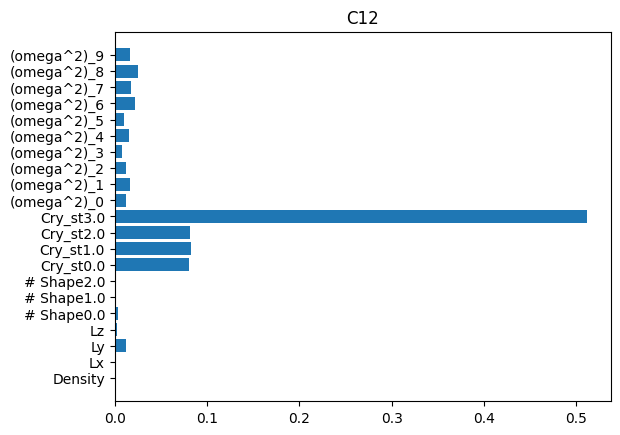

In [43]:
print(listaX_antigua)
print(MI_antigua)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.barh(listaX_antigua, MI_antigua)
ax1.set_title(target)

['bx', 'by', 'bz', '# Shape0.0', '# Shape1.0', '# Shape2.0', 'Cry_st0.0', 'Cry_st1.0', 'Cry_st2.0', 'Cry_st3.0', 'eig_0', 'eig_1', 'eig_2', 'eig_3', 'eig_4', 'eig_5', 'eig_6', 'eig_7', 'eig_8', 'eig_9']
[0.00282496 0.00211927 0.         0.00406621 0.         0.
 0.0804978  0.08246243 0.08196186 0.51195184 0.         0.01229152
 0.01537157 0.01230892 0.01394764 0.02288389 0.01783909 0.01726922
 0.02253067 0.02345688]


Text(0.5, 1.0, 'C12')

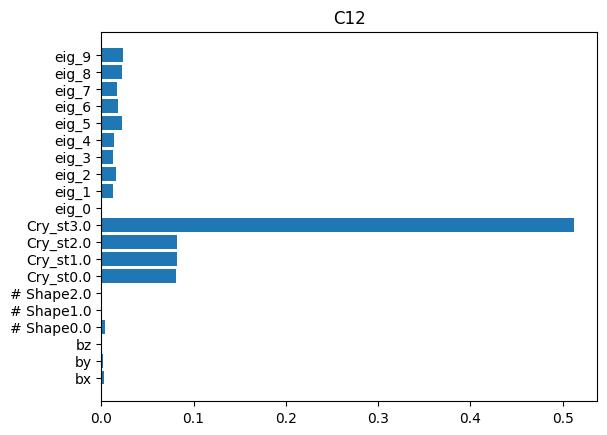

In [44]:
print(listaX_nueva)
print(MI_nueva)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.barh(listaX_nueva, MI_nueva)
ax2.set_title(target)